In [1]:
import pandas as pd
import numpy as np

In [2]:
can_data = pd.read_excel('F:\python scripts\data analysis\Canada.xlsx',
                          sheet_name='Canada by Citizenship',
                          skiprows=range(20),
                          skipfooter=2)
can_data

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59


#### we are going to drop some columns that are unimportant 

In [3]:
cols_to_drop = ['Type','Coverage','AREA','DEV','REG']
can_data.drop(cols_to_drop,axis=1,inplace=True)

In [4]:
can_data.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
can_data.rename(columns={'OdName':'Country','AreaName':'Continents','RegName':'Region'},inplace=True)
can_data.head()

,Country,Continents,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [11]:
can_data.set_index('Country',inplace=True)

In [12]:
can_data.columns=list(map(str,can_data.columns))

In [13]:
can_data['1980']

Country
Afghanistan         16
Albania              1
Algeria             80
American Samoa       0
Andorra              0
                  ... 
Viet Nam          1191
Western Sahara       0
Yemen                1
Zambia              11
Zimbabwe            72
Name: 1980, Length: 195, dtype: int64

In [14]:
can_data['Total'] = can_data.sum(axis=1)

In [15]:
years = list(map(str,range(1980,2014)))

# Visualizing the data

In [16]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [17]:
plt.style.use('ggplot')

In [18]:
can_data.groupby('Continents').sum()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continents,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


In [19]:
Continents_data = can_data.groupby('Continents').sum()

In [12]:
can_data.groupby('Continents').sum()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Continents,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


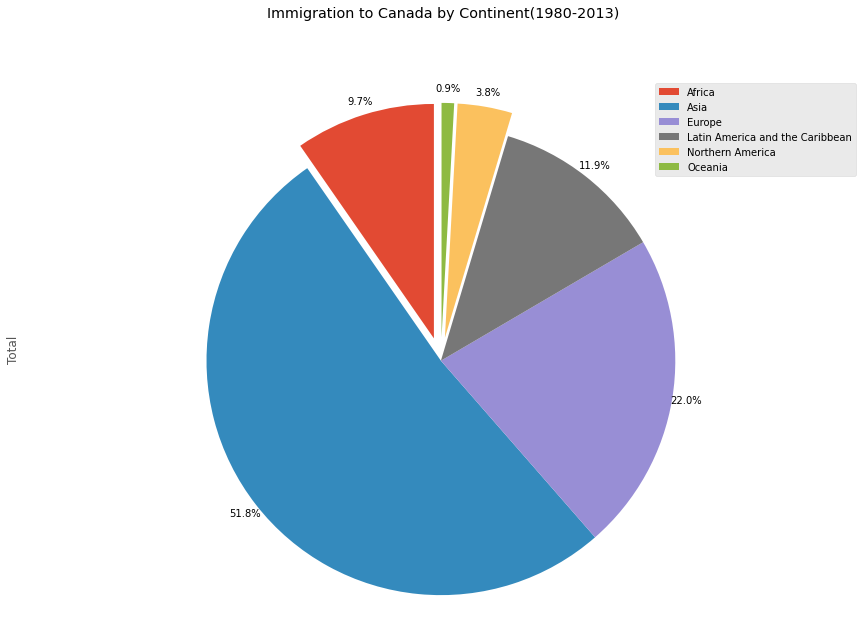

In [20]:
Continents_data['Total'].plot(kind='pie',figsize=(15,10),autopct='%.1f%%',startangle=90,labels=None,
                             explode=[.1,0,0,0,.1,.1],pctdistance=1.06)
plt.legend(labels=Continents_data.index,loc='upper right')
plt.axis('equal')
plt.title('Immigration to Canada by Continent(1980-2013)',y=1.1)
plt.show()

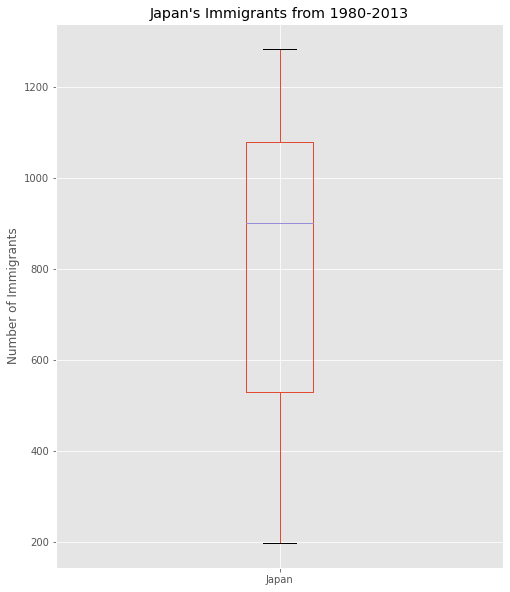

In [21]:
can_data.loc[['Japan'],years].transpose().plot(kind='box',figsize=(8,10))
plt.title("Japan's Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.show()

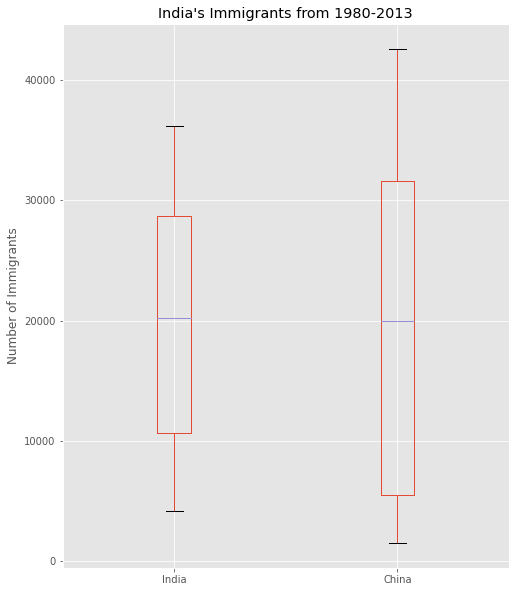

In [22]:
can_data.loc[['India','China'],years].transpose().plot(kind='box',figsize=(8,10))
plt.title("India's Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.show()

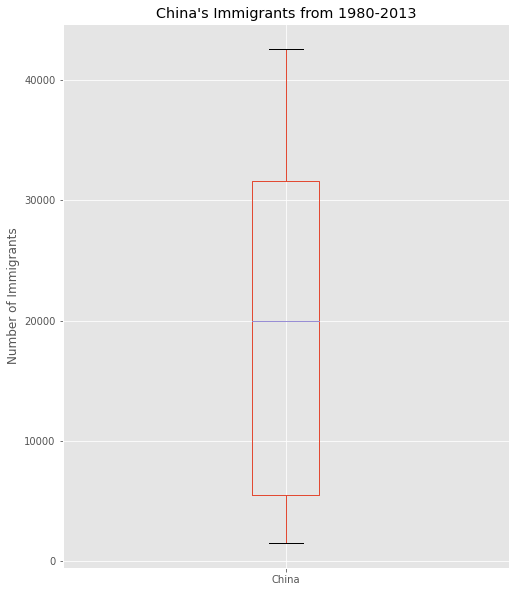

In [23]:
can_data.loc[['China'],years].transpose().plot(kind='box',figsize=(8,10))
plt.title("China's Immigrants from 1980-2013")
plt.ylabel("Number of Immigrants")
plt.show()

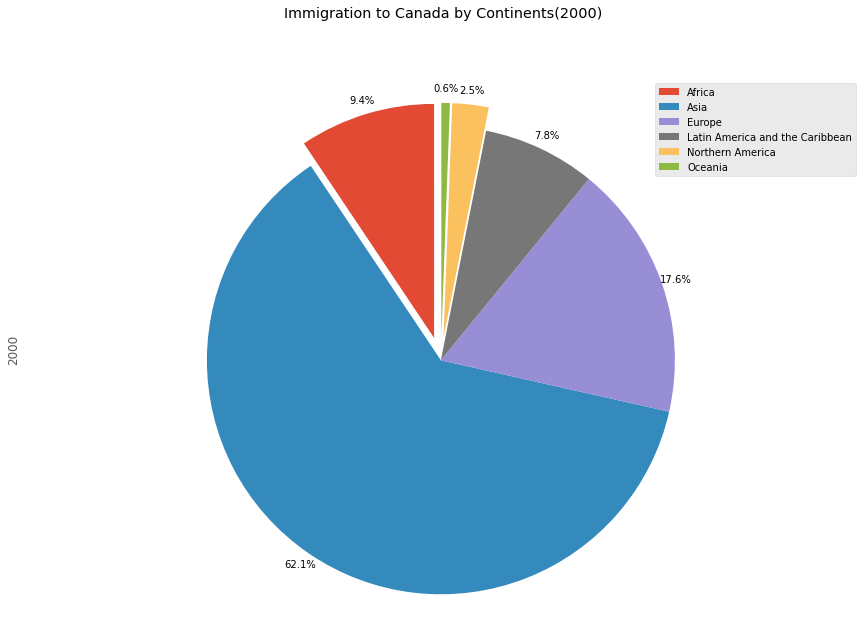

In [24]:
Continents_data[years[20]].plot(kind='pie',figsize=(15,10),autopct='%.1f%%',startangle=90,labels=None,
                             explode=[.1,0,0,0,.1,.1],pctdistance=1.06)
plt.legend(labels=Continents_data.index,loc='upper right')
plt.axis('equal')
plt.title('Immigration to Canada by Continents(2000)',y=1.1)
plt.show()

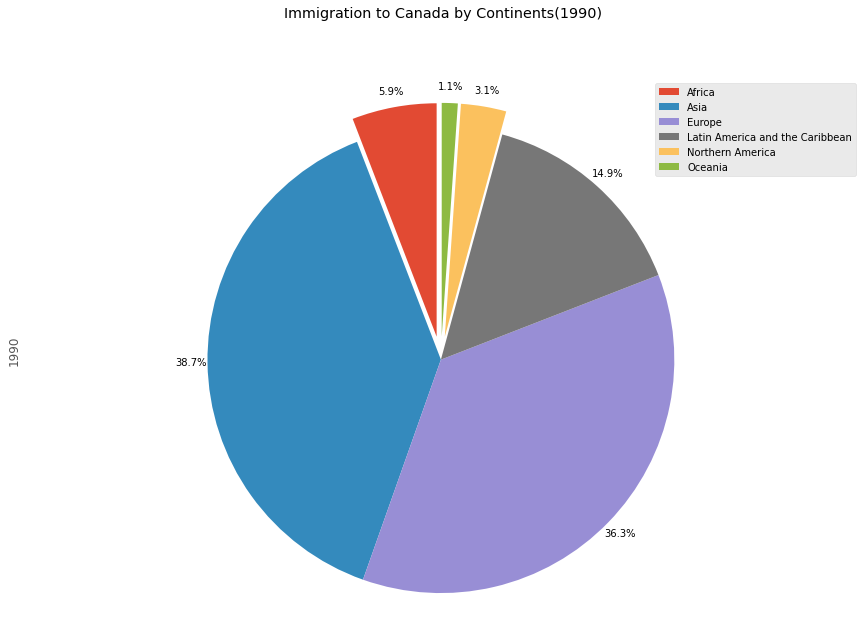

In [25]:
Continents_data[years[10]].plot(kind='pie',figsize=(15,10),autopct='%.1f%%',startangle=90,labels=None,
                             explode=[.1,0,0,0,.1,.1],pctdistance=1.07)
plt.legend(labels=Continents_data.index,loc='upper right')
plt.axis('equal')
plt.title('Immigration to Canada by Continents(1990)',y=1.1)
plt.show()

# subplots

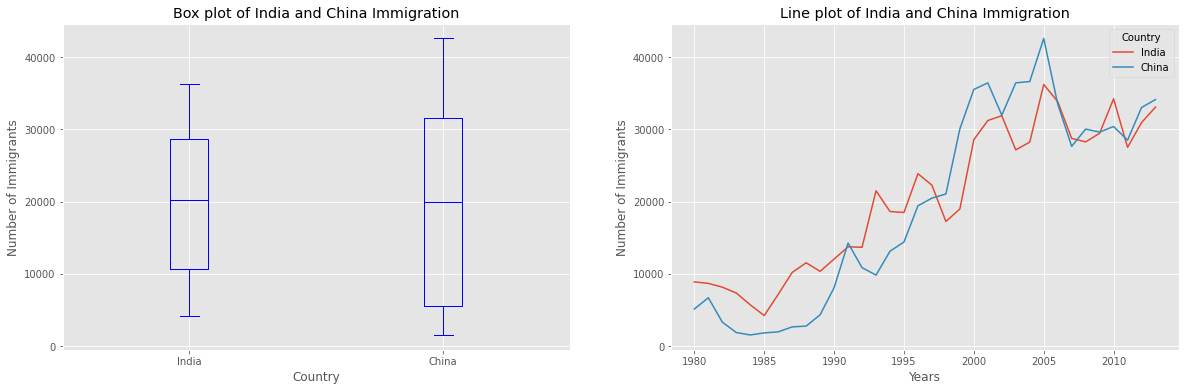

In [26]:
IC_data = can_data.loc[['India','China'],years].transpose()
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
IC_data.plot(kind='box',color='blue',figsize=(20,6),ax=ax1)
ax1.set_title('Box plot of India and China Immigration')
ax1.set_xlabel('Country')
ax1.set_ylabel('Number of Immigrants')

IC_data.plot(figsize=(20,6),ax=ax2)
ax2.set_title('Line plot of India and China Immigration')
ax2.set_xlabel('Years')
ax2.set_ylabel('Number of Immigrants')
plt.show()

In [27]:
total_data = can_data[years].sum().reset_index()
total_data.columns={'Year':'Total','Total':'Year'}
total_data

,Year,Total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417
5,1985,69978
6,1986,86048
7,1987,134771
8,1988,139306
9,1989,164432


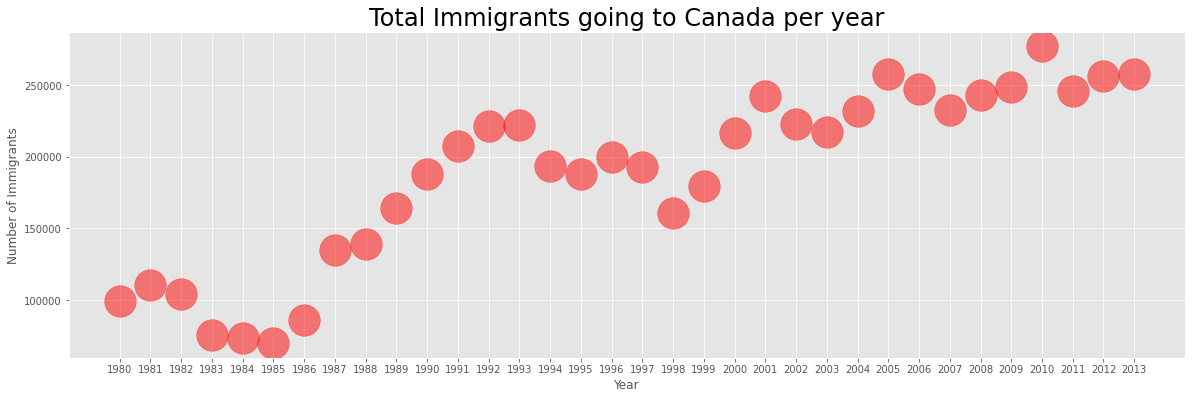

In [28]:
total_data.plot(kind='scatter',figsize=(20,6),color='red',x='Year',y='Total',s=1000,alpha=0.5)
plt.title('Total Immigrants going to Canada per year',size=24)
plt.ylabel('Number of Immigrants')
plt.show()

In [29]:
BA_data = can_data.loc[['Brazil','Argentina'],years].transpose()
BA_data.columns={'Brazil','Argentina'}
BA_data

,Brazil,Argentina
1980,211,368
1981,220,426
1982,192,626
1983,139,241
1984,145,237
1985,130,196
1986,205,213
1987,244,519
1988,394,374
1989,650,538


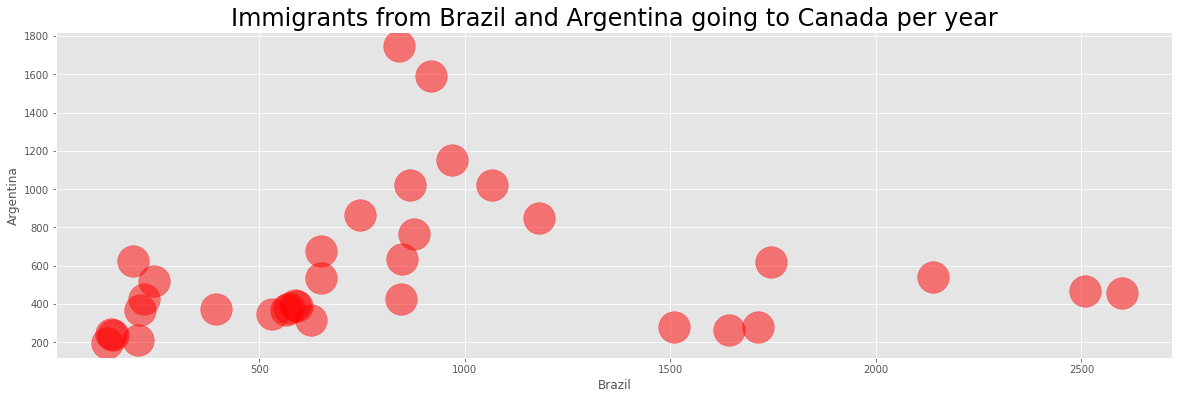

In [30]:
BA_data.plot(kind='scatter',color = 'red',figsize=(20,6),x='Brazil',y='Argentina',s=1000,alpha=0.5)
plt.title('Immigrants from Brazil and Argentina going to Canada per year',size=24)
plt.show()

In [31]:
can_data.sort_values(by = 'Total',ascending = False ,inplace=True)

In [32]:
top5_data = can_data.head()
top5_data = top5_data[years].transpose()
top5_data.rename(columns={'United Kingdom of Great Britain and Northern Ireland':'UK'},inplace=True)
top5_data.head()

Country,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


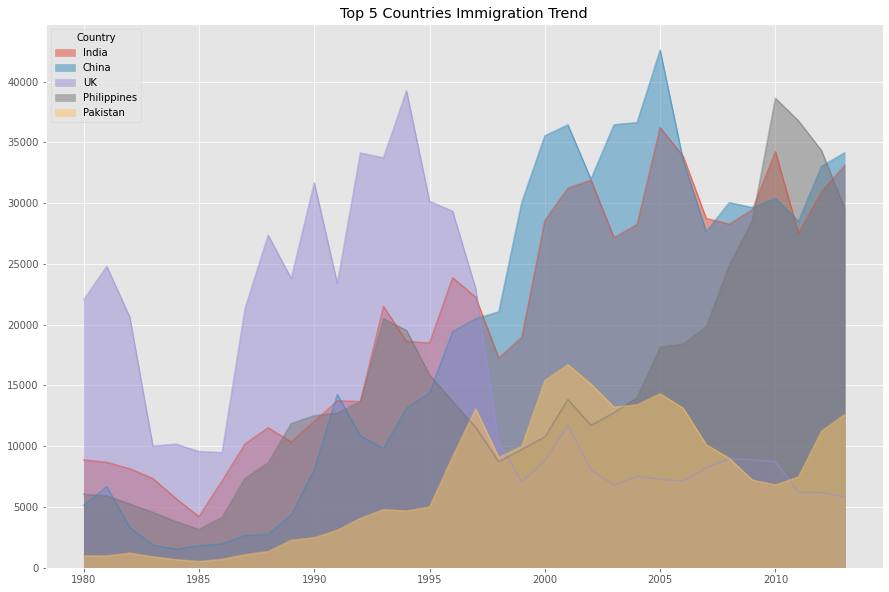

In [33]:
top5_data.plot(kind='area',figsize = (15,10),stacked=False,title = 'Top 5 Countries Immigration Trend')
plt.show()

In [34]:
Ice_data = can_data.loc['Iceland',years]

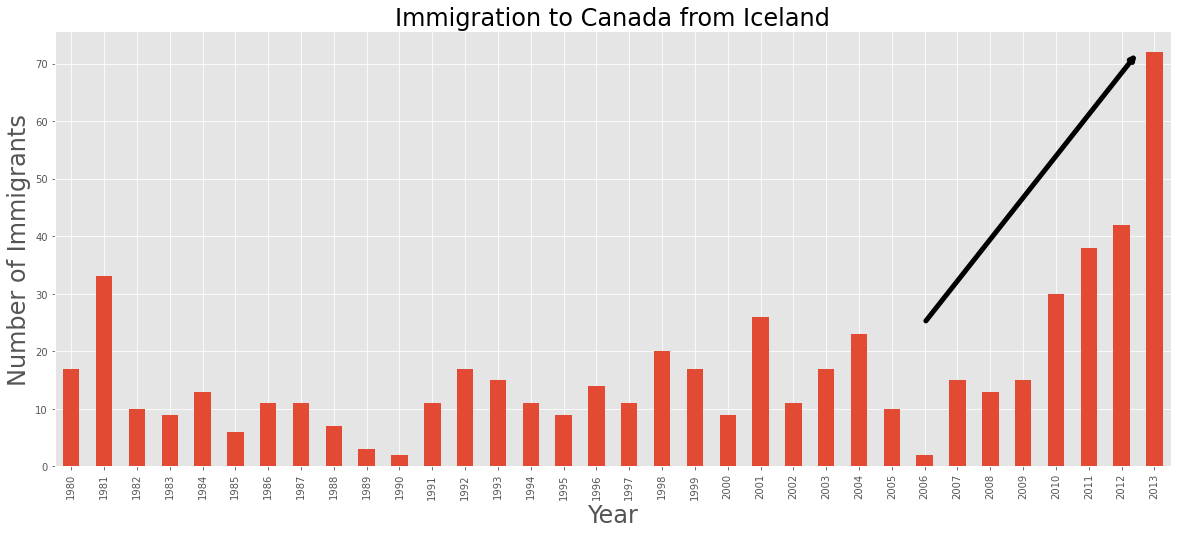

In [35]:
Ice_data.plot(kind='bar',figsize=(20,8))
plt.title('Immigration to Canada from Iceland',size=24)
plt.xlabel('Year',size=24)
plt.ylabel('Number of Immigrants',size=24)
plt.annotate('',
     xy=(32.5,72),
     xytext=(26,25),
     xycoords="data",
     arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='black',lw=5)
)
plt.show()

In [36]:
plt.annotate?

Signature: plt.annotate(text, xy, *args, **kwargs)
Docstring:
Annotate the point *xy* with text *text*.

In the simplest form, the text is placed at *xy*.

Optionally, the text can be displayed in another position *xytext*.
An arrow pointing from the text to the annotated point *xy* can then
be added by defining *arrowprops*.

Parameters
----------
text : str
    The text of the annotation.  *s* is a deprecated synonym for this
    parameter.

xy : (float, float)
    The point *(x, y)* to annotate. The coordinate system is determined
    by *xycoords*.

xytext : (float, float), default: *xy*
    The position *(x, y)* to place the text at. The coordinate system
    is determined by *textcoords*.

xycoords : str or `.Artist` or `.Transform` or callable or (float, float), default: 'data'

    The coordinate system that *xy* is given in. The following types
    of values are supported:

    - One of the following strings:

      =================   =========================================